# FINAL LAB : "You choose" project

By Lexxi Reddington ~ June 3, 2019

###  <font color='red'> OPTION #1: Chapter 9, Image Processing

### Read the chapter, and complete all the Assigments:

In [16]:
import scipy.ndimage as sim, numpy as np, matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

####  9.1 CONVOLUTION

####  - Your Turn 9A:

#Part (a)
For this case, C is the same as I because F is only a 1 x 1 matrix with a single entry equal to 1. As a result, the summation of F is equal to 1, and 1 multiplied by I is I. Therefore, C and I are equal for this trivial transformation.

#Part (b)
The size of the resulting image due to convolution is the summation of the size of the filter and the original image less one. This is due to the way convolution works, and is evident on the edges (making the image larger allows for accurate convolution on the edge pixels). The indicies (i, j) go from (0, 0) to (M + m - 2, N + n - 2), which can be rewritten as ((M - 1) + (m - 1), (N - 1) + (n - 1)). Meanwhile, (k, l) goes from (0, 0) to (m - 1, n - 1). Therefore C has the size (M + m - 1) x (N + n - 1). 

####  - Section 9.1.1 Python tools for image processing

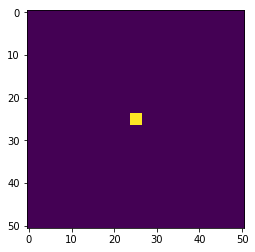

In [17]:
impulse = np.zeros((51, 51))
impulse[25, 25] = 1.0
my_filter = np.ones((3, 3))/9
response = sim.convolve(impulse, my_filter, mode='constant')
plt.figure()
plt.imshow(response)
plt.show()

####  - Section 9.1.2 Averaging

The average pixel value for neighboring pixels around the pixel at (500, 500) is  42.49333333333333
The value of the pixel at (500, 500) after convolution is 42
They are effectively the same!
This shows that the convolutions as defined in Equation 9.1 produce images in which each pixel is the average of some of the neighboring pixels in the original


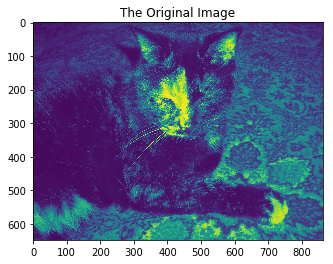

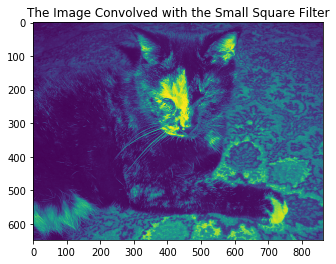

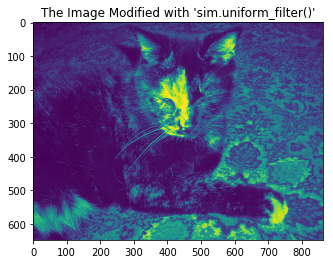

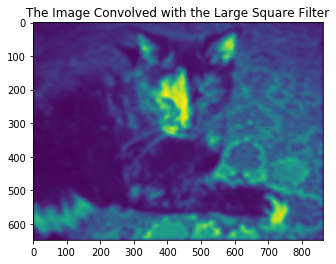

In [55]:
#Part (a)-----------------------------------------------
#ORIGINAL PHOTO
photo = plt.imread('bwCat.tif')
plt.title("The Original Image")
plt.imshow(photo)

#SMALL SQUARE FILTER
my_filter = [[1/9, 1/9, 1/9], [1/9, 1/9, 1/9], [1/9, 1/9, 1/9]]
#It makes sense to use the value 1/9 because we are using a 3 x 3 array (3*3=9)
#Using 1/9 as the value allows us to best filter and average the surrounding pixels
#without overly blurring the image.

#Part (b)-----------------------------------------------
response = sim.convolve(photo, my_filter, mode='constant')
plt.figure()
plt.title("The Image Convolved with the Small Square Filter")
plt.imshow(response)
#How the Image Changes ~ The original image has areas that I describe as spikey
#They are lighter in color than the surrounding pixles and make the image look a bit pixelated
#Adding the filter brings these high colors down, effectively averaging them with the surrounding pixels.
#As a result, the image looks smoother and more even.

#UNIFORM FILTER
response2 = sim.uniform_filter(photo, size=3)
plt.figure()
plt.title("The Image Modified with 'sim.uniform_filter()'")
plt.imshow(response2)

#Part (c)-----------------------------------------------
#LARGE SQUARE FILTER
my_filter_large = np.ones((15, 15))*(1/225)
response3 = sim.convolve(photo, my_filter_large, mode='constant')
plt.figure()
plt.title("The Image Convolved with the Large Square Filter")
plt.imshow(response3)
#How the Image Changes ~ Each pixel gets averaged with the surrounding 15 x 15 pixels, as opposed to 3 x 3.
#This makes the image much more blurry and blends in with the background more.
#How the Image Compares to the Smaller Filter ~ The large filter makes the image much more blurry.
#As a result, for smoothing the image, the smaller filter is better.

#Part (d)-----------------------------------------------
pixel_value = response3[500, 500]
filter_slice = photo[y_coord-7:y_coord+8, y_coord-7:y_coord+8]
print("The average pixel value for neighboring pixels around the pixel at (500, 500) is ", str(np.average(filter_slice)))
print("The value of the pixel at (500, 500) after convolution is", str(pixel_value))
print("They are effectively the same!")
print("This shows that the convolutions as defined in Equation 9.1 produce images in which each pixel is the average of some of the neighboring pixels in the original")

####  - Section 9.1.3 Gaussian smoothing

(51, 51) (51, 51)


Text(0.5, 0.92, 'Convolved Images in 3D - Small Square Filter')

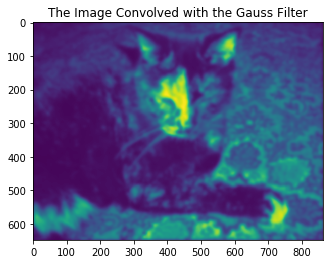

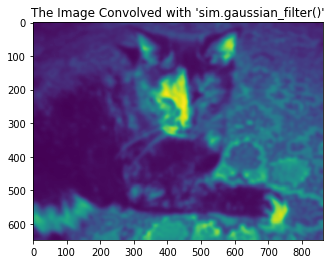

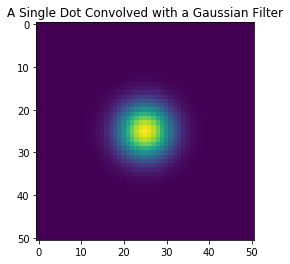

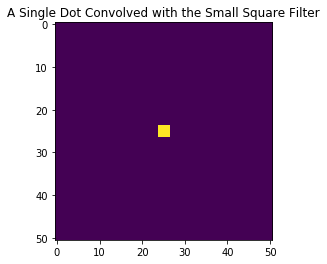

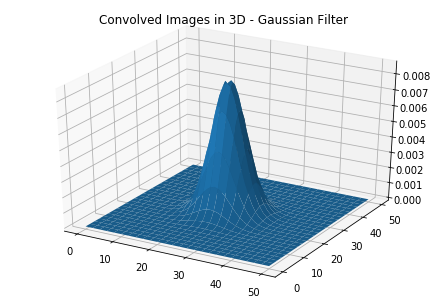

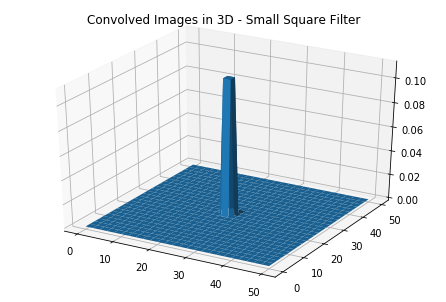

In [56]:
#Part (a)-----------------------------------------------
gauss = np.loadtxt("gauss_filter.csv", delimiter=",")

original_photo = plt.imread('bwCat.tif')
gauss_convolution = sim.convolve(original_photo, gauss, mode='constant')
plt.figure()
plt.title("The Image Convolved with the Gauss Filter")
plt.imshow(gauss_convolution)

gauss_convolution2 = sim.gaussian_filter(original_photo, sigma=5)
plt.figure()
plt.title("The Image Convolved with 'sim.gaussian_filter()'")
plt.imshow(gauss_convolution2)

#Part (b)-----------------------------------------------
dot = np.zeros((51, 51))
dot[25, 25] = 1.0

gauss_dot_convolution = sim.convolve(dot, gauss, mode='constant')
plt.figure()
plt.title("A Single Dot Convolved with a Gaussian Filter")
plt.imshow(gauss_dot_convolution)

my_dot_filter = np.ones((3, 3))/9
dot_response = sim.convolve(dot, my_dot_filter)
plt.figure()
plt.title("A Single Dot Convolved with the Small Square Filter")
plt.imshow(dot_response)

#Part (c)-----------------------------------------------
X = np.arange(0, 51, 1)
Y = np.arange(0, 51, 1)
X, Y = np.meshgrid(X, Y)
ax = Axes3D(plt.figure())
ax.plot_surface(X, Y, gauss_dot_convolution)
ax.set_title("Convolved Images in 3D - Gaussian Filter")

ax = Axes3D(plt.figure())
print(Y.shape,dot_response.shape)
ax.plot_surface(X, Y, dot_response)
ax.set_title("Convolved Images in 3D - Small Square Filter")

#Explanation
#The definition of convolution lends itself to these surface plots, which are actually plots of the filters
#This is the case because the z-axis is defined by the response of the convolution from the filter
#The Gaussian filter averages the pixels in a Gaussian distribution manner, which is why we get the color differentiation
#The square filter only filters over a 3x3 array, rather than a distribution. So there is no color gradient here
#The Gaussian filter may be preferred for smoothing out images in an even way
#Alternatively, the square filter may be preferred to only filter small sections, which decreases potential blurriness

####  9.2 DENOISING

Text(0.5, 1.0, 'ZOOMED IN: Gaussian Filter Applied to the Noisy Image')

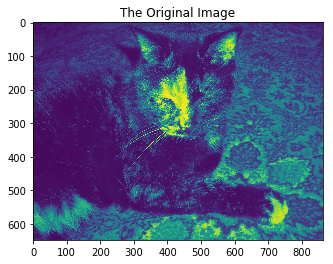

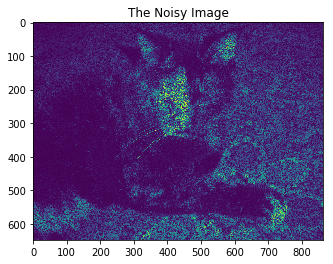

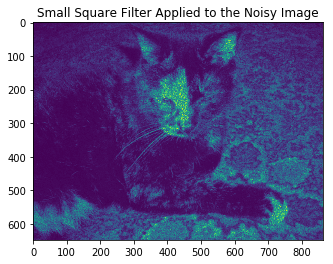

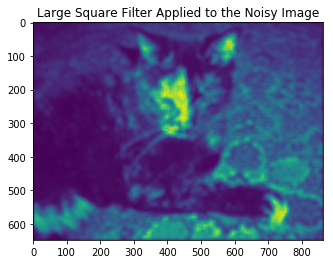

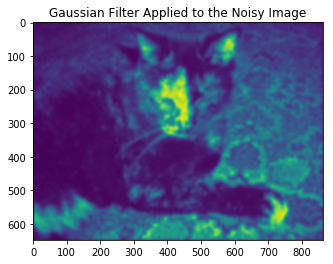

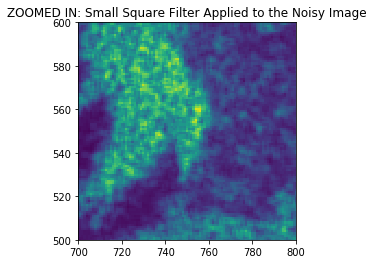

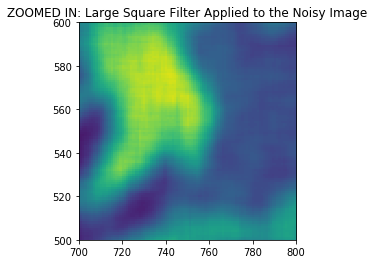

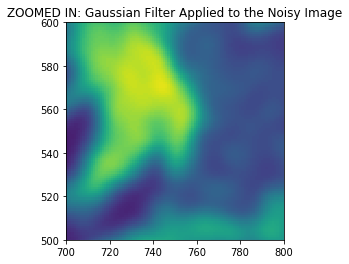

In [58]:
#Part (a)-----------------------------------------------
plt.figure()
plt.imshow(photo)
plt.title("The Original Image")

photo_multiply = photo * np.random.random(photo.shape)
image_min_value = np.amin(photo_multiply)

photo_minus_min = photo_multiply - image_min_value
image_max_value = np.amax(photo_multiply)

photo_rescaled = photo_minus_min * (255/image_max_value)

final_photo_noised = photo_rescaled.astype('uint8')
plt.figure()
plt.imshow(final_photo_noised)
plt.title("The Noisy Image")

#Part (b)-----------------------------------------------
small_square_filter = [[1/9, 1/9, 1/9], [1/9, 1/9, 1/9], [1/9, 1/9, 1/9]]
denoise_1 = sim.convolve(final_photo_noised, small_square_filter, mode='constant')
plt.figure()
plt.imshow(denoise_1)
plt.title("Small Square Filter Applied to the Noisy Image")

large_square_filter = np.ones((15, 15))*(1/225)
denoise_2 = sim.convolve(final_photo_noised, large_square_filter, mode='constant')
plt.figure()
plt.imshow(denoise_2)
plt.title("Large Square Filter Applied to the Noisy Image")

gauss_filter = np.loadtxt("gauss_filter.csv", delimiter=",")
denoise_3 = sim.convolve(final_photo_noised, gauss_filter, mode='constant')
plt.figure()
plt.imshow(denoise_3)
plt.title("Gaussian Filter Applied to the Noisy Image")

#Explanation
#Compared to the noisy image, the small square filter does the best at denoising the image
#The large square filter and gaussian filter make the image seem blurrier than it should be.
#In all cases, the filter do seem to diminish some of the noise.
#The small square filter seems to be the best for this purpose though, likely because it is averaging over the smallest area.

plt.figure()
plt.xlim(700, 800)
plt.ylim(500, 600)
plt.imshow(denoise_1)
plt.title("ZOOMED IN: Small Square Filter Applied to the Noisy Image")

plt.figure()
plt.xlim(700, 800)
plt.ylim(500, 600)
plt.imshow(denoise_2)
plt.title("ZOOMED IN: Large Square Filter Applied to the Noisy Image")

plt.figure()
plt.xlim(700, 800)
plt.ylim(500, 600)
plt.imshow(denoise_3)
plt.title("ZOOMED IN: Gaussian Filter Applied to the Noisy Image")

#Explanation
#At the zoomed in level, the small square filter image seems much more pixelated
#The large square filter and the Gaussian filter images are much smoother when zoomed in
#The large square filter image is slightly more pixelated thant the Gaussian one

####  9.3 EMPHASIZING

Text(0.5, 1.0, 'The Fiber Image with a Horizontal Emphasis + Emphasis Modification')

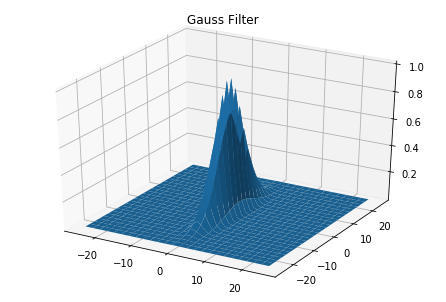

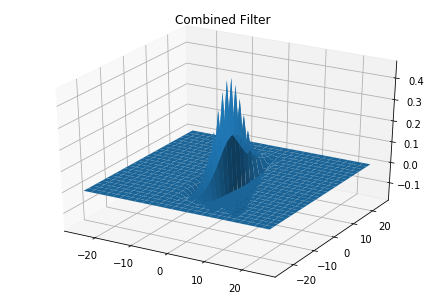

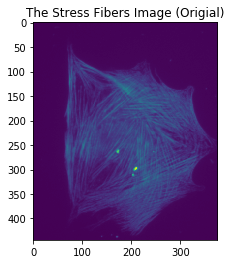

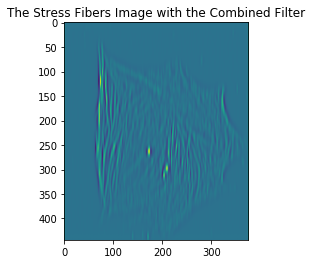

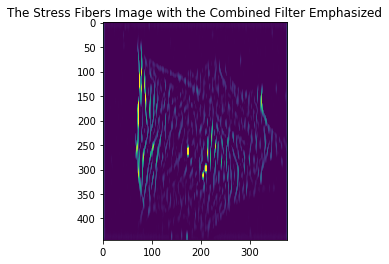

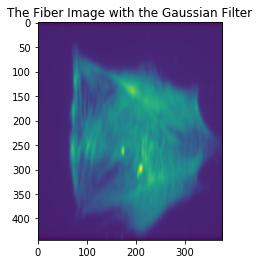

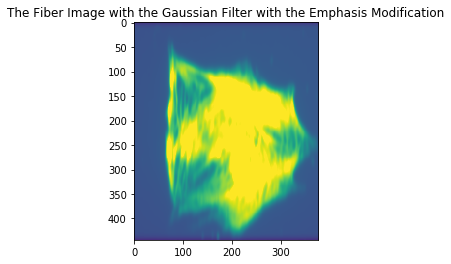

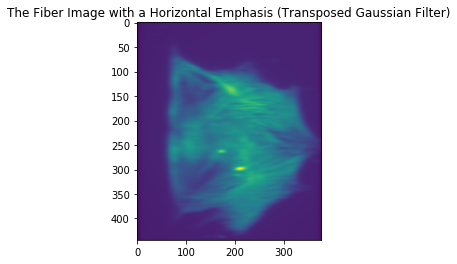

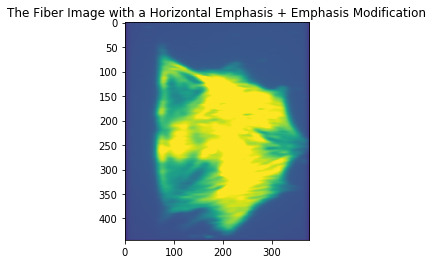

In [61]:
#Part (a)-----------------------------------------------
v = np.arange(-25, 26)
X, Y = np.meshgrid(v, v)
gauss_filter = np.exp(-0.5*(X**2/2 + Y**2/45))
ax = Axes3D(plt.figure())
ax.plot_surface(X, Y, gauss_filter)
ax.set_title("Gauss Filter")
#Significant Features: The plot has the characteristic Gaussian distribution shape!
#Once again, the filter is represented on the z-axis

#Part (b)-----------------------------------------------
laplace_filter = np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]])
combined_filter = sim.convolve(gauss_filter, laplace_filter)
ax = Axes3D(plt.figure())
ax.plot_surface(X, Y, combined_filter)
ax.set_title("Combined Filter")
#The combined filter accentuates the edges whereas the Gauss filter emphasizes the long, slender, vertically-oriented features
#The combined filter has a similar shape as the Gauss filter, but is smaller and slightly less spread out

#Part (c)-----------------------------------------------
fiber = np.loadtxt("stressFibers.csv", delimiter=",")
plt.figure()
plt.imshow(fiber)
plt.title("The Stress Fibers Image (Origial)")

fiber_filtered = sim.convolve(fiber, combined_filter, mode='constant')
plt.figure()
plt.imshow(fiber_filtered)
plt.title("The Stress Fibers Image with the Combined Filter")
#Comment: The filtered image has poor contrast
#After convolution, the values assigned to some pixels are extremely large and extremely negative
#Some points fall in a narrow range between the extremes
#As a result, most of the pixels are a level in the middle of the range

plt.figure()
plt.imshow(fiber_filtered, vmin=0, vmax = 0.5*fiber_filtered.max())
plt.title("The Stress Fibers Image with the Combined Filter Emphasized")

#Part (d)-----------------------------------------------
fiber_vertical = sim.convolve(fiber, gauss_filter, mode='constant')
plt.figure()
plt.imshow(fiber_vertical)
plt.title("The Fiber Image with the Gaussian Filter")

plt.figure()
plt.imshow(fiber_vertical, vmin=0, vmax = 0.5*fiber_vertical.max())
plt.title("The Fiber Image with the Gaussian Filter with the Emphasis Modification")

horizontal_gauss_filter = np.transpose(gauss_filter)
fiber_horizontal = sim.convolve(fiber, horizontal_gauss_filter, mode='constant')
plt.figure()
plt.imshow(fiber_horizontal)
plt.title("The Fiber Image with a Horizontal Emphasis (Transposed Gaussian Filter)")

plt.figure()
plt.imshow(fiber_horizontal, vmin=0, vmax = 0.5*fiber_horizontal.max())
plt.title("The Fiber Image with a Horizontal Emphasis + Emphasis Modification")

#Transposing the gauss_filter changes the vertical emphasis into a horizontal emphasis in the image